In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_dummies.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168018 entries, 0 to 168017
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Month       168018 non-null  int64
 1   DayofMonth  168018 non-null  int64
 2   ArrTime     168018 non-null  int64
 3   DepDelay    168018 non-null  int64
 4   Distance    168018 non-null  int64
 5   DayofWeek   168018 non-null  int64
 6   Dest_ATL    168018 non-null  int64
 7   Dest_DEN    168018 non-null  int64
 8   Dest_DFW    168018 non-null  int64
 9   Dest_LAX    168018 non-null  int64
 10  Dest_ORD    168018 non-null  int64
dtypes: int64(11)
memory usage: 14.1 MB


In [5]:
df_col = df.columns
df_0 = df[df_col]

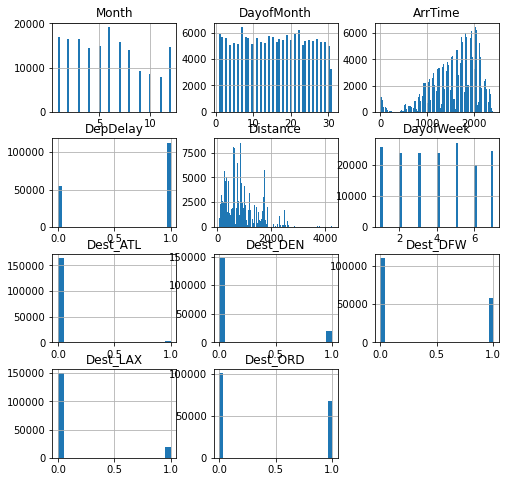

In [6]:
#look at histograms for each feature
df_0.hist(figsize  = [8, 8], bins='auto');

In [7]:
# use long on distance to regularize distribution more
df['dist_log'] = np.log10(df['Distance'], where=True)

In [8]:
df.replace([np.inf, -np.inf], 0, inplace=True)

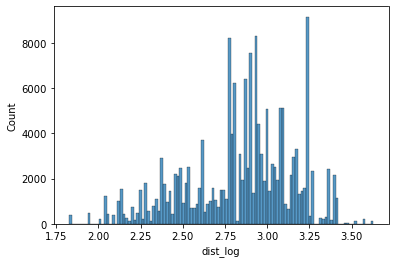

In [9]:
sns.histplot(df, x='dist_log');

In [10]:
df = df.drop(columns=['Distance'], axis=1)

In [11]:
df.describe()

,Month,DayofMonth,ArrTime,DepDelay,DayofWeek,Dest_ATL,Dest_DEN,Dest_DFW,Dest_LAX,Dest_ORD,dist_log
count,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000,168018.000000
mean,5.929930,15.700234,1601.609304,0.671666,3.950261,0.021539,0.121481,0.345659,0.109542,0.401778,2.841313
std,3.378179,8.800756,466.279935,0.469608,2.001802,0.145174,0.326686,0.475584,0.312319,0.490259,0.319812
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.826075
25%,3.000000,8.000000,1317.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.635484
50%,6.000000,16.000000,1705.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.893762
75%,8.000000,23.000000,1948.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.078094
max,12.000000,31.000000,2400.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.627673


In [12]:
df.corr()

,Month,DayofMonth,ArrTime,DepDelay,DayofWeek,Dest_ATL,Dest_DEN,Dest_DFW,Dest_LAX,Dest_ORD,dist_log
Month,1.000000,0.031627,-0.000925,-0.028346,-0.003800,-0.001728,-0.013994,0.022203,0.018766,-0.023657,0.005929
DayofMonth,0.031627,1.000000,0.005763,0.002310,0.026379,0.002962,-0.007909,0.011439,0.003692,-0.009056,0.000354
ArrTime,-0.000925,0.005763,1.000000,0.106429,-0.003381,-0.010659,-0.000725,-0.006602,0.009057,0.004274,0.091510
DepDelay,-0.028346,0.002310,0.106429,1.000000,-0.006932,0.004299,-0.026202,-0.046566,-0.022360,0.075603,-0.027133
DayofWeek,-0.003800,0.026379,-0.003381,-0.006932,1.000000,0.000737,0.010932,-0.011199,0.013998,-0.005557,0.014860
Dest_ATL,-0.001728,0.002962,-0.010659,0.004299,0.000737,1.000000,-0.055173,-0.107837,-0.052039,-0.121593,-0.002830
Dest_DEN,-0.013994,-0.007909,-0.000725,-0.026202,0.010932,-0.055173,1.000000,-0.270272,-0.130425,-0.304748,0.110121
Dest_DFW,0.022203,0.011439,-0.006602,-0.046566,-0.011199,-0.107837,-0.270272,1.000000,-0.254921,-0.595641,-0.064783
Dest_LAX,0.018766,0.003692,0.009057,-0.022360,0.013998,-0.052039,-0.130425,-0.254921,1.000000,-0.287439,0.199586
Dest_ORD,-0.023657,-0.009056,0.004274,0.075603,-0.005557,-0.121593,-0.304748,-0.595641,-0.287439,1.000000,-0.136844


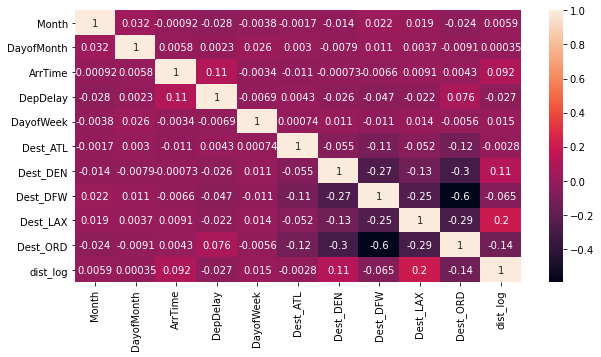

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,)
plt.show()